In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import io
from glob import glob
from zipfile import ZipFile
import pandas as pd
import requests
import tensorflow as tf

In [ ]:
%cd '/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50'

/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50


In [ ]:
!pwd

/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50


In [ ]:
from glob import glob

file_path = glob('./이미지/원천데이터/*/**/',recursive=True)
print(file_path)

['./이미지/원천데이터/깎기/', './이미지/원천데이터/깎기/사과/', './이미지/원천데이터/깎기/감자/', './이미지/원천데이터/깎기/배/', './이미지/원천데이터/깎기/고구마/', './이미지/원천데이터/냉장고 사용/', './이미지/원천데이터/냉장고 사용/냉장고/', './이미지/원천데이터/골프 치기/', './이미지/원천데이터/골프 치기/골프/', './이미지/원천데이터/경고음/', './이미지/원천데이터/경고음/철길 건널목/', './이미지/원천데이터/경고음/구급차/', './이미지/원천데이터/경운기 작업/', './이미지/원천데이터/경운기 작업/시동/', './이미지/원천데이터/경운기 작업/주행/', './이미지/원천데이터/끓이기/', './이미지/원천데이터/끓이기/국/', './이미지/원천데이터/끓이기/물/', './이미지/원천데이터/끓이기/면/', './이미지/원천데이터/끓이기/찌개/', './이미지/원천데이터/굽기/', './이미지/원천데이터/굽기/떡갈비/', './이미지/원천데이터/굽기/삼겹살/', './이미지/원천데이터/굽기/닭고기/', './이미지/원천데이터/굽기/생선/', './이미지/원천데이터/다지기(채소)/', './이미지/원천데이터/다지기(채소)/마느

In [ ]:
label_lst = []
for f in file_path:
  label = f.split('/')
  if len(label) ==6:
    label_lst.append(label[3]+'_'+label[4])

print(label_lst)

['깎기_사과', '깎기_감자', '깎기_배', '깎기_고구마', '냉장고 사용_냉장고', '골프 치기_골프', '경고음_철길 건널목', '경고음_구급차', '경운기 작업_시동', '경운기 작업_주행', '끓이기_국', '끓이기_물', '끓이기_면', '끓이기_찌개', '굽기_떡갈비', '굽기_삼겹살', '굽기_닭고기', '굽기_생선', '다지기(채소)_마늘', '다지기(채소)_생강', '다지기(채소)_양파', '당구 치기_당구', '다지기(고기)_고기', '대패질_대패', '러닝머신 운동하기_러닝머신', '따르기_막걸리', '따르기_차', '따르기_포도주', '드라이어 사용_헤어 드라이어', '면도하기_일반 면도기', '면도하기(전동)_전기 면도기', '면도하기(전동)_코털 깎기', '무치기_겉절이', '무치기_나물', '무치기_샐러드', '믹서기 갈기_곡물갈기', '믹서기 갈기_고기갈기', '믹서기 갈기_과일갈기', '믹서기 갈기_야채갈기', '볼링 치기_볼링', '버스 벨_버스 벨', '분무기 작업_수동 분무기', '사찰 종_사찰 종', '불 지피기_모닥불', '불 지피기_아궁이', '선박 운항_어선'

In [ ]:
s = file_path[1]
sr = s.split('/')
sa = sr[3]+'_'+sr[4]
print(sa)

깎기_사과


In [3]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import base64
import cv2
import matplotlib.pyplot as plt
import json 
from tqdm.notebook import tqdm 
import scipy 
from joblib import Parallel , delayed

(4032, 3024, 3)


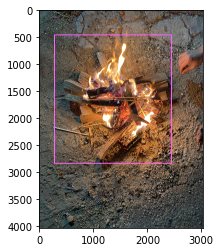

In [ ]:
sample = cv2.imread(f'./이미지/원천데이터/불 지피기/모닥불/불 지피기_모닥불_Im10179957.jpg')
print(sample.shape)

image = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

image = cv2.rectangle(image,(285,460),(2155+285,2375+460,),(255,100,255),15)
plt.imshow(image)

In [4]:
%cd '/content/drive/MyDrive/전주해커톤/사용할_데이터'
!pwd

/content/drive/MyDrive/전주해커톤/사용할_데이터
/content/drive/MyDrive/전주해커톤/사용할_데이터


In [ ]:
#yolov5 모델 다운로드
#!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14302, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 14302 (delta 26), reused 31 (delta 13), pack-reused 14242
Receiving objects: 100% (14302/14302), 13.65 MiB | 5.90 MiB/s, done.
Resolving deltas: 100% (9826/9826), done.
Checking out files: 100% (145/145), done.


In [5]:
%cd yolov5
#!pip install -r requirements.txt

/content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5


In [6]:
import yaml
import torch
from IPython.display import Image, clear_output

In [7]:
%cd /content
%cd ..

/content
/


In [ ]:
from glob import glob

train_img_lst = glob('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/*/*/**.jpg', recursive=True)


with open('/content/drive/MyDrive/전주해커톤/사용할_데이터/train.txt','w') as f:
  f.write('\n'.join(train_img_lst)+'\n')

In [ ]:
print(len(train_img_lst))

6225


In [8]:
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [10]:
label_img_lst = glob('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/*/**/', recursive=True)
print(len(label_img_lst))

35


In [ ]:
label_img_lst

In [ ]:
label_lst = []
file_lst = []
for f in label_img_lst:
  label = f.split('/')
  if len(label) ==11:
    label_lst.append(f)
    file_lst.append(label[9])
print(label_lst)
print(file_lst)

['/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/다듬이질/다듬잇돌/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/교회 종/교회 종/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/괘종시계 작동/괘종시계/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/먹 갈기/먹 갈기/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/떡메질/떡메/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/맷돌 갈기/맷돌/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/물레방아 돌기/물레방아/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/석유풍로 사용/석유풍로/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/숫돌 갈기/숫돌/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/싸리비 질/싸리비/', '/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/엿장수/가위질/', '/cont

In [ ]:
len(file_lst)

18

In [ ]:
%%writetemplate /content/drive/MyDrive/전주해커톤/사용할_데이터/data.yaml

train: '/content/drive/MyDrive/전주해커톤/사용할_데이터/train.txt'
val: '/content/drive/MyDrive/전주해커톤/사용할_데이터/train.txt'
nc: 18
names: ['다듬잇돌', '교회 종', '괘종시계', '먹 갈기', '떡메', '맷돌', '물레방아', '석유풍로', '숫돌', '싸리비', '가위질', '엿 자르기', '작두', '절구', '타자기', '키', '풍로', '확독']

In [ ]:
print(file_lst)
len(file_lst)

['다듬잇돌', '교회 종', '괘종시계', '먹 갈기', '떡메', '맷돌', '물레방아', '석유풍로', '숫돌', '싸리비', '가위질', '엿 자르기', '작두', '절구', '타자기', '키', '풍로', '확독']


18

In [ ]:
%cat /content/drive/MyDrive/전주해커톤/사용할_데이터/data.yaml


train: '/content/drive/MyDrive/전주해커톤/사용할_데이터/train.txt'
val: '/content/drive/MyDrive/전주해커톤/사용할_데이터/train.txt'
nc: 18
names: ['다듬잇돌', '교회 종', '괘종시계', '먹 갈기', '떡메', '맷돌', '물레방아', '석유풍로', '숫돌', '싸리비', '가위질', '엿 자르기', '작두', '절구', '타자기', '키', '풍로', '확독']


In [ ]:
import yaml

with open('/content/drive/MyDrive/전주해커톤/사용할_데이터/data.yaml', 'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

  print(num_classes)

18


In [ ]:
!cat /content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%%writetemplate /content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 18  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
%cd /content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5
!pwd

/content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5
/content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5


In [ ]:
# 데이터 학습
!python train.py --img 520 --batch 32 --epochs 2 --data /content/drive/MyDrive/전주해커톤/사용할_데이터/data.yaml --cfg /content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5/models/yolov5s.yaml --weight '' --name train_result --cache

train: weights=, cfg=/content/drive/MyDrive/전주해커톤/사용할_데이터/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/전주해커톤/사용할_데이터/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=32, imgsz=520, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=train_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

sayoung = ['사찰 종', '교회 종', '물레방아', '풍로', '석유 풍로', '먹 갈기', 
'다듬이질', '숫돌 갈기', '키질', '싸리비 질', '작두질', '괘종시계', '타자기',
'절구질', '맷돌 갈기', '엿장수', '떡메질']
sayoung.sort()
sayoung

In [11]:
label_list = []
for f in label_img_lst:
  label = f.split('/')
  if len(label) ==11:
    label_list.append(str(label[8]+'_'+label[9]))
print(label_list)

['다듬이질_다듬잇돌', '교회 종_교회 종', '괘종시계 작동_괘종시계', '먹 갈기_먹 갈기', '떡메질_떡메', '맷돌 갈기_맷돌', '물레방아 돌기_물레방아', '석유풍로 사용_석유풍로', '숫돌 갈기_숫돌', '싸리비 질_싸리비', '엿장수_가위질', '엿장수_엿 자르기', '작두질_작두', '절구질_절구', '타자 치기_타자기', '키질_키', '풍로 사용_풍로', '확독 갈기_확독']


In [12]:
# 전처리 및 파일 생성
# 폴더 이름 바꾸기!
import cv2
import json
from glob import glob
def padding(img, set_size):

    try:
        h,w,c = img.shape
        H = h
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    if h < w:
        new_width = set_size
        new_height = int(new_width * (h/w))
    else:
        new_height = set_size
        new_width = int(new_height * (w/h))

    if max(h, w) < set_size:
        img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC)
    else:
        img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA)
    try:
        h,w,c = img.shape
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    img_result=np.zeros((set_size,set_size, 3),dtype="uint8")
    # print(img_result.dtype,img.dtype)
    img_result[0:h,0:w]=img[:,:,:]
    ratio = h/H
    return img_result,ratio

In [58]:
file_list=glob("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/**/*.jpg", recursive=True)
print(len(file_list))

6222


In [ ]:
print(len(glob("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/다듬이질/다듬잇돌/*.jpg")))
len(glob('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/다듬이질/다듬잇돌/*'))

69


69

In [50]:
file_list = file_list[3332:]

In [51]:
file_list.index('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/타자 치기/타자기/타자 치기_타자기_Im10467810.jpg')

2124

In [52]:
file_list = file_list[2125:]

In [53]:
file_list.index('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/image/키질/키/키질_키_Im10136023.jpg')

415

In [54]:
file_list = file_list[416:]

In [55]:
len(file_list)

350

In [ ]:
%mkdir /content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/labels

In [ ]:
import shutil
shutil.rmtree('/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/labels')

In [56]:
# file_list=glob("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/**/*.jpg", recursive=True)
# print(len(file_list))
for filename in file_list:
    img = cv2.imread(filename)
    label_name= filename.split("/")
    label_name[7]="label"
    label_name[-1]=label_name[-1].replace(".jpg",".json")
    label_name = "/".join(label_name)
    # print(label_name)
    with open(label_name, 'r') as f:
        print(f)
        json_data = json.load(f)
        #print(json_data)
    bbox=json.dumps(json_data, ensure_ascii = False)
    bbox=json.loads(bbox)
    img,ratio = padding(img, 720)
    h0,w0,c=img.shape
    crdnt_list = []
    for temp in bbox["annotations"]:
      x,y,w,h=int(temp["bbox"]["bndex_xcrdnt"]*ratio),int(temp["bbox"]["bndex_ycrdnt"]*ratio),int(temp["bbox"]["bndex_width"]*ratio),int(temp["bbox"]["bndex_hg"]*ratio)
      x,y=x+w//2,y+h//2
      crdnt_list.append([round(x/w0,6),round(y/h0,6),round(w/w0,6),round(h/h0,6)])

    tempbox=filename.split("/")[10].split("_")
    # print("label:",label_list.index(tempbox[0]+"_"+tempbox[1]))
    with open("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/labels/"+filename.split("/")[-1].replace(".jpg",".txt"), 'w') as f:
      for temp in crdnt_list:
        f.writelines(str(label_list.index(tempbox[0]+"_"+tempbox[1]))+" "+" ".join(map(str, temp)))

    cv2.imwrite("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/images/"+filename.split("/")[-1],img)


<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380339.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380338.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380340.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380337.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380344.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/풍로 사용/풍로/풍로 사용_풍로_Im10380341.json' mode='r

In [57]:
txt_list=glob("/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/labels/*.txt", recursive=True)
print(len(txt_list))

6222


In [46]:
print(h,w,c)

828 1101 3


In [ ]:
json_data

{'info': {'description': '다듬이질_다듬잇돌 관련 이미지',
  'version': '2022',
  'class': {'depth1': '다듬이질', 'depth2': '다듬잇돌'}},
 'license': {'agree': 'Y', 'owner': '김광용', 'info': '이미지 공개 사용 동의'},
 'image': {'file_path': 'image/다듬이질/다듬잇돌',
  'file_name': '다듬이질_다듬잇돌_Im10089053.jpg',
  'shooting_date': '2022-08-29',
  'region_name': '경기 용인시 기흥구 민속촌로 90',
  'description': '다듬잇돌 관련 이미지',
  'file_format': 'JPG',
  'file_size': 1755271,
  'width': 4032,
  'height': 3024},
 'annotations': [{'id': 1,
   'object': '다듬이질',
   'bbox': {'bndex_xcrdnt': 749,
    'bndex_ycrdnt': 549,
    'bndex_width': 3249,
    'bndex_hg': 1699}}]}

In [ ]:
!cat /content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/다듬이질/다듬잇돌/다듬이질_다듬잇돌_Im10000071.json

{"info":{"description":"다듬이질_다듬잇돌 사용하기 관련 이미지
,"version":"2022","class":{"depth1":"다듬이질","depth2":"다듬잇돌"}},
"license":{"agree":"Y","owner":"김광용","info":"이미지 공개 사용 동의"
},"image":{"file_path":"image/다듬이질/다듬잇돌","file_name":"다듬이질_
다듬잇돌_Im10000071.jpg","shooting_date":"2022-08-28","region_
name":"경기 용인시 기흥구 민속촌로 90","description":"다듬잇돌 사
용하기 관련 이미지","file_format":"JPG","file_size":1342891,"widt
h":4032,"height":3024},"annotations":[{"id":1,"object":"다듬이질",
"bbox":{"bndex_xcrdnt":1029,"bndex_ycrdnt":149,"bndex_width":2729,"b
ndex_hg":2709}}]}


In [ ]:
s = r'''{'info': {'description': '다듬이질_다듬잇돌 관련 이미지',
  'version': '2022',
  'class': {'depth1': '다듬이질', 'depth2': '다듬잇돌'}},
 'license': {'agree': 'Y', 'owner': '김광용', 'info': '이미지 공개 사용 동의'},
 'image': {'file_path': 'image/다듬이질/다듬잇돌',
  'file_name': '다듬이질_다듬잇돌_Im10089053.jpg',
  'shooting_date': '2022-08-29',
  'region_name': '경기 용인시 기흥구 민속촌로 90',
  'description': '다듬잇돌 관련 이미지',
  'file_format': 'JPG',
  'file_size': 1755271,
  'width': 4032,
  'height': 3024},
 'annotations': [{'id': 1,
   'object': '다듬이질',
   'bbox': {'bndex_xcrdnt': 749,
    'bndex_ycrdnt': 549,
    'bndex_width': 3249,
    'bndex_hg': 1699}}]}'''
print(s[45:50])

# {"info":{"description":"다듬이질_다듬잇돌 사용하기 관련 이미지",
#          "version":"2022",
#          "class":{"depth1":"다듬이질","depth2":"다듬잇돌"}},
#  "license":{"agree":"Y","owner":"김광용","info":"이미지 공개 사용 동의"},
#  "image":{"file_path":"image/다듬이질/다듬잇돌",
#           "file_name":"다듬이질_다듬잇돌_Im10095314.jpg",
#           "shooting_date":"2022-08-28",
#           "region_name":"경기 용인시 기흥구 민속촌로 90",
#           "description":"다듬잇돌 사용하기 관련 이미지",
#           "file_format":"JPG","file_size":1149845,"width":4032,"height":3024}
#  ,"annotations":[{"id":1,"object":"다듬이질","bbox":{"bndex_xcrdnt":539,
#                                                  "bndex_ycrdnt":119,"bndex_width
#                                                  ":2169,"bndex_hg":2879}}]}

  've


In [ ]:
tempbox

['다듬이질', '다듬잇돌', 'Im10089053.jpg']

In [ ]:
f

<_io.TextIOWrapper name='/content/drive/MyDrive/전주해커톤/사용할_데이터/이미지/label/다듬이질/다듬잇돌/다듬이질_다듬잇돌_Im10000071.json' mode='r' encoding='UTF-8'>

In [ ]:
i = str(label_list.index(tempbox[0]+"_"+tempbox[1]))+" "+" ".join(map(str, temp))
i

'0 0.5875 0.346094 0.805469 0.421094'

In [ ]:
tempbox

['다듬이질', '다듬잇돌', 'Im10089053.jpg']

In [ ]:
crdnt_list

[[0.5875, 0.346094, 0.805469, 0.421094]]

In [ ]:
temp

[0.5875, 0.346094, 0.805469, 0.421094]